In [38]:
import pdkit

## load data

In [7]:
filename = './tests/data/kinetic_tremor_left_hand.csv'

In [40]:
ts = pdkit.TremorTimeSeries().load(filename)
tp = pdkit.TremorProcessor()

ts.head(10)

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000000,0.000000,-1.498238,9.466142,1.375655,9.682200
1970-01-01 00:00:00.018219,0.018219,-1.498238,9.575105,1.457377,9.800577
1970-01-01 00:00:00.036377,0.036377,-1.525479,9.575105,1.498238,9.810935
1970-01-01 00:00:00.054291,0.054291,-1.566340,9.507003,1.566340,9.761657
1970-01-01 00:00:00.072174,0.072174,-1.607201,9.466142,1.648062,9.742025
1970-01-01 00:00:00.093903,0.093903,-1.688923,9.343558,1.757025,9.656173
1970-01-01 00:00:00.113861,0.113861,-1.729784,9.234595,1.757025,9.558087
1970-01-01 00:00:00.133911,0.133911,-1.688923,9.302697,1.688923,9.604431
1970-01-01 00:00:00.153931,0.153931,-1.648062,9.466142,1.566340,9.735367
1970-01-01 00:00:00.175110,0.175110,-1.566340,9.615966,1.539099,9.863521


## resample the data frame

In [17]:
resampled_data_frame = tp.resample_signal(ts)
resampled_data_frame.head(10)

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000,0.000000,-1.498238,9.466142,1.375655,9.682200
1970-01-01 00:00:00.010,0.018219,-1.498238,9.575105,1.457377,9.747174
1970-01-01 00:00:00.020,0.027298,-1.511859,9.575105,1.477808,9.801593
1970-01-01 00:00:00.030,0.036377,-1.525479,9.575105,1.498238,9.807297
1970-01-01 00:00:00.040,0.045334,-1.545910,9.541054,1.532289,9.800969
1970-01-01 00:00:00.050,0.054291,-1.566340,9.507003,1.566340,9.773461
1970-01-01 00:00:00.060,0.063232,-1.586771,9.486572,1.607201,9.755390
1970-01-01 00:00:00.070,0.072174,-1.607201,9.466142,1.648062,9.744411
1970-01-01 00:00:00.080,0.083039,-1.648062,9.404850,1.702543,9.711104
1970-01-01 00:00:00.090,0.093903,-1.688923,9.343558,1.757025,9.671594


## plot the original/resampled data 

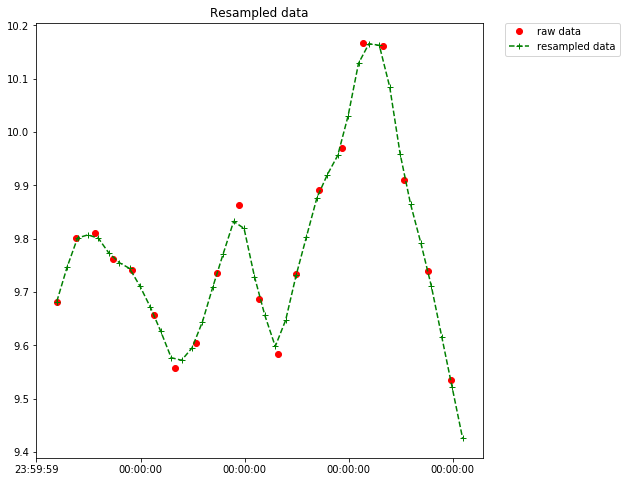

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title('Resampled data')
plt.plot(ts.index[0:20], ts.mag_sum_acc[0:20], 'or', label="raw data")
plt.plot(resampled_data_frame.index[0:40], resampled_data_frame.mag_sum_acc[0:40], '--+g', label="resampled data")
# plt.plot(df_resampled.index[0:110], df_resampled.mag_sum_acc[0:110], '-g')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117d35f60>],
      dtype=object)

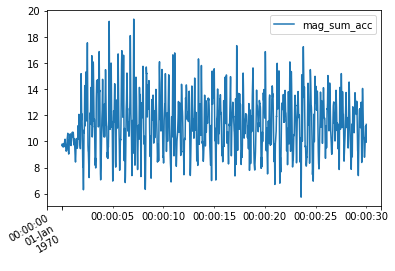

In [30]:
resampled_data_frame.loc[:,['mag_sum_acc']].plot(subplots=True)

## high pass filter the data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117f84400>],
      dtype=object)

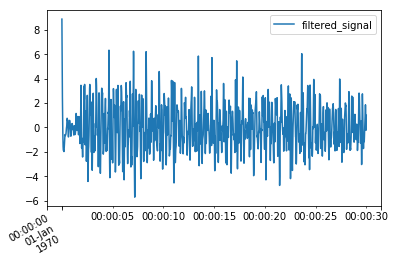

In [31]:
filtered_data_frame = tp.filter_signal(resampled_data_frame)
filtered_data_frame.loc[:,['filtered_signal']].plot(subplots=True)

## Fast Fourier Transform on the data 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1165f3978>],
      dtype=object)

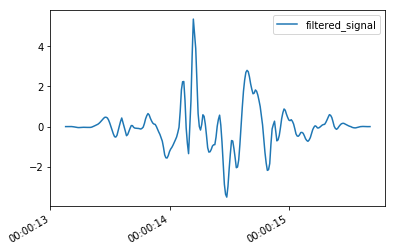

In [34]:
fft_data_frame = tp.fft_signal(filtered_data_frame)
fft_data_frame.loc[:,['filtered_signal']].plot(subplots=True)

## calculate tremor amplitude, frequency

In [36]:
amplitude, frequency = tp.tremor_amplitude(fft_data_frame)
print('Tremor amplitude: ', amplitude, ', frequency: ', frequency)

Tremor amplitude:  2.390463750531757 , frequency:  2.34375
